# Project Request: 

1. Which lesson appears to attract the most traffic consistently across cohorts (per program)?
2. Is there a cohort that referred to a lesson significantly more than other cohorts seemed to gloss over?
3. Are there students who, when active, hardly access the curriculum? If so, what information do you have about these students?
4. Is there any suspicious activity, such as users/machines/etc accessing the curriculum who shouldn’t be? Does it appear that any web-scraping is happening? Are there any suspicious IP addresses?
5. At some point in 2019, the ability for students and alumni to access both curriculums (web dev to ds, ds to web dev) should have been shut off. Do you see any evidence of that happening? Did it happen before?
6. What topics are grads continuing to reference after graduation and into their jobs (for each program)?
7. Which lessons are least accessed?
8. Anything else I should be aware of?

In [1]:
# imports: 
import pandas as pd 
import numpy as np
import wrangle as wr

# visualizations: 
import seaborn as sns
import matplotlib.pyplot as plt

# import 
import warnings
warnings.filterwarnings("ignore")

# Explore:  

In [2]:
# acquire and prepare the data: 
df = wr.prep_logs_plain()

In [3]:
# look at the data:
df.head()

,name,start_date,end_date,program_id,path,user_id,cohort_id,ip,datetime
0,Arches,2014-02-04,2014-04-22,1,javascript-i/arrays,11.0,1.0,97.105.19.61,2018-01-31 15:52:32
1,Arches,2014-02-04,2014-04-22,1,javascript-i,11.0,1.0,97.105.19.61,2018-01-31 15:52:29
2,Arches,2014-02-04,2014-04-22,1,javascript-i/arrays,11.0,1.0,97.105.19.61,2018-01-31 14:59:38
3,Arches,2014-02-04,2014-04-22,1,javascript-i,11.0,1.0,97.105.19.61,2018-01-31 14:32:22
4,Arches,2014-02-04,2014-04-22,1,javascript-i/arrays,11.0,1.0,97.105.19.61,2018-01-31 14:32:19


# Figure out what the data means: 

In [4]:
# what are the names: 
cohort_names = df[['name','cohort_id']].drop_duplicates()
cohort_names.head()

,name,cohort_id
0,Arches,1.0
70,Glacier,7.0
80,Hampton,8.0
105,Kings,13.0
182,Lassen,14.0


In [5]:
# how many cohorts are there?
cohort_names.shape

(47, 2)

In [6]:
# How long does each cohort go? 
df['start_date'] = pd.to_datetime(df['start_date'])
df['end_date'] = pd.to_datetime(df['end_date'])

# calculate the duration of the cohort: 
df['cohort_duration'] = (df['end_date'] - df['start_date']).dt.days // 7

# groupby: 
cohort_durations = df.groupby('name')['cohort_duration'].unique()
cohort_durations

name
Andromeda     [19]
Apex          [22]
Apollo        [17]
Arches        [11]
Badlands      [11]
Bash          [26]
Bayes         [23]
Betelgeuse    [19]
Ceres         [21]
Curie         [22]
Darden        [26]
Deimos        [23]
Denali        [12]
Easley        [26]
Europa        [23]
Everglades    [14]
Florence      [24]
Fortuna       [23]
Franklin      [16]
Ganymede      [21]
Glacier       [17]
Hampton       [19]
Hyperion      [24]
Ike           [16]
Joshua        [16]
Jupiter       [27]
Kalypso       [26]
Kings         [16]
Lassen        [16]
Luna          [26]
Mammoth       [18]
Marco         [25]
Neptune       [24]
Niagara       [19]
Oberon        [24]
Olympic       [15]
Pinnacles     [16]
Quincy        [15]
Sequoia       [20]
Staff          [0]
Teddy         [18]
Ulysses       [19]
Voyageurs     [19]
Wrangell      [18]
Xanadu        [20]
Yosemite      [21]
Zion          [19]
Name: cohort_duration, dtype: object

In [7]:
df.program_id.value_counts()

2    713365
3    103411
1     30548
4         5
Name: program_id, dtype: int64

In [8]:
program_1 = df[df.program_id == 1]

In [9]:
program_1.name.value_counts()

Lassen        9587
Arches        8890
Olympic       4954
Kings         2845
Hampton       1712
Quincy        1237
Glacier        598
Joshua         302
Ike            253
Badlands        93
Franklin        72
Denali           4
Everglades       1
Name: name, dtype: int64

In [10]:
program_2 = df[df.program_id == 2]

In [11]:
# how many cohorts are there
program_2.name.value_counts()

Staff         84031
Ceres         40730
Zion          38096
Jupiter       37109
Fortuna       36902
Voyageurs     35636
Ganymede      33844
Apex          33568
Deimos        32888
Teddy         30926
Hyperion      29855
Betelgeuse    29356
Ulysses       28534
Europa        28033
Xanadu        27749
Wrangell      25586
Andromeda     25359
Kalypso       23691
Yosemite      20743
Bash          17713
Luna          16623
Marco         16397
Sequoia        7444
Neptune        7276
Pinnacles      2158
Oberon         1672
Niagara         755
Mammoth         691
Name: name, dtype: int64

In [12]:
program_3 = df[df.program_id == 3]

In [13]:
program_3.name.value_counts()

Darden      32015
Bayes       26538
Curie       21581
Easley      14715
Florence     8562
Name: name, dtype: int64

In [14]:
program_4 = df[df.program_id == 4]

In [88]:
program_4.name.value_counts()

Apollo    5
Name: name, dtype: int64

In [15]:
df.groupby('name')['user_id'].nunique().reset_index(name='user_count')

,name,user_count
0,Andromeda,28
1,Apex,24
2,Apollo,1
3,Arches,18
4,Badlands,3
5,Bash,23
6,Bayes,23
7,Betelgeuse,22
8,Ceres,29
9,Curie,21


In [16]:
cohort_1_paths = df[df['cohort_id'] == 1]
path_counts_cohort_1 = cohort_1_paths.groupby('path').size().reset_index(name='count')
path_counts_cohort_1.sort_values('count', ascending=False).head(2)

,path,count
0,/,626
213,javascript-i,294


### Question 1:
Which lesson appears to attract the most traffic consistently across cohorts (per program)?
- Web development
- Data Science

### Web Development: 

In [17]:
wd = df[df.program_id != 3]

In [18]:
wd.groupby(['path']).size().reset_index(name='count').sort_values(ascending = False, by = 'count').head()

,path,count
4,/,37496
1599,javascript-i,18193
2024,toc,17580
1861,search/search_index.json,15331
1572,java-iii,13162


In [19]:
ds = df[df.program_id == 3]

In [20]:
ds.groupby(['path']).size().reset_index(name='count').sort_values(ascending = False, by = 'count').head()

,path,count
3,/,8358
592,search/search_index.json,2203
397,classification/overview,1785
19,1-fundamentals/modern-data-scientist.jpg,1655
17,1-fundamentals/AI-ML-DL-timeline.jpg,1651


# Question 2:  
Is there a cohort that referred to a lesson significantly more than other cohorts seemed to gloss over?

### Web Development

In [21]:
wd[wd['path'] != '/'].groupby(['name', 'path']).size().reset_index(name='count').sort_values(['count'], 
    ascending=[ False]).groupby('name').head(1).reset_index(drop=True)

,name,path,count
0,Jupiter,toc,1866
1,Staff,javascript-i,1817
2,Apex,search/search_index.json,1497
3,Zion,toc,1465
4,Ceres,search/search_index.json,1380
5,Fortuna,toc,1293
6,Ganymede,search/search_index.json,1095
7,Hyperion,toc,1022
8,Wrangell,toc,991
9,Europa,toc,964


In [22]:
wd[wd.path == 'toc'].groupby('name').path.value_counts().sort_values(ascending = False)

name        path
Jupiter     toc     1866
Zion        toc     1465
Fortuna     toc     1293
Hyperion    toc     1022
Wrangell    toc      991
Europa      toc      964
Staff       toc      911
Ceres       toc      911
Marco       toc      910
Ganymede    toc      822
Apex        toc      810
Deimos      toc      750
Yosemite    toc      697
Andromeda   toc      638
Betelgeuse  toc      610
Kalypso     toc      495
Neptune     toc      451
Xanadu      toc      443
Bash        toc      404
Luna        toc      373
Voyageurs   toc      272
Oberon      toc      101
Ulysses     toc       89
Teddy       toc       83
Arches      toc       66
Sequoia     toc       36
Olympic     toc       22
Glacier     toc       13
Kings       toc       13
Pinnacles   toc       12
Quincy      toc       12
Lassen      toc       10
Niagara     toc        8
Ike         toc        6
Hampton     toc        5
Joshua      toc        3
Badlands    toc        2
Mammoth     toc        1
Name: path, dtype: int64

### Data Science

In [23]:
ds[ds['path'] != '/'].groupby(['name', 'path']).size().reset_index(name='count').sort_values(['count'], 
    ascending=[ False]).groupby('name').head(1).reset_index(drop=True)

,name,path,count
0,Darden,classification/overview,1109
1,Bayes,1-fundamentals/modern-data-scientist.jpg,650
2,Florence,fundamentals/modern-data-scientist.jpg,627
3,Curie,6-regression/1-overview,595
4,Easley,classification/scale_features_or_not.svg,463


In [24]:
ds[ds.path == 'classification/overview'].groupby('name').path.value_counts()

name      path                   
Bayes     classification/overview      35
Curie     classification/overview     136
Darden    classification/overview    1109
Easley    classification/overview     445
Florence  classification/overview      60
Name: path, dtype: int64

# Question 3: 
Are there students who, when active, hardly access the curriculum? If so, what information do you have about these students?

In [25]:
wd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 743918 entries, 0 to 847335
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   name             743918 non-null  object        
 1   start_date       743918 non-null  datetime64[ns]
 2   end_date         743918 non-null  datetime64[ns]
 3   program_id       743918 non-null  int64         
 4   path             743918 non-null  object        
 5   user_id          743918 non-null  float64       
 6   cohort_id        743918 non-null  float64       
 7   ip               743918 non-null  object        
 8   datetime         743918 non-null  datetime64[ns]
 9   cohort_duration  743918 non-null  int64         
dtypes: datetime64[ns](3), float64(2), int64(2), object(3)
memory usage: 62.4+ MB


In [26]:
# What is defined as active?
# current students within thier cohort start dates
active_wd = wd.loc[(wd.datetime >= wd.start_date) & (wd.datetime <= wd.end_date)]
active_ds = ds.loc[(ds.datetime >= ds.start_date) & (ds.datetime <= ds.end_date)]

### Web Development: 

In [33]:
# how many days were students active?
wd['days_active'] = (df.datetime - df.start_date).dt.days

In [34]:
# how many days were students accessing after the end date
wd['post_access'] = (df.datetime - df.end_date).dt.days

In [89]:
active_wd.groupby(['user_id']).size().reset_index(name = 'acess').sort_values(by = 'acess').head(30)

,user_id,acess
567,918.0,1
385,619.0,1
589,940.0,1
549,879.0,1
525,832.0,3
156,278.0,4
334,539.0,5
563,895.0,6
601,956.0,6
510,812.0,7


In [78]:
active_ds.groupby(['user_id']).size().reset_index(name = 'acess').sort_values(by = 'acess')

,user_id,acess
44,679.0,11
62,697.0,13
23,487.0,17
74,839.0,92
93,902.0,196
...,...,...
80,845.0,1891
12,475.0,2102
63,698.0,2177
30,581.0,2316


# Question 4: 

In [64]:
def one_user_df_prep(df, user):
    '''
    This function returns a dataframe consisting of data for only a single defined user
    '''
    df = df[df.user_id == user]
    df.datetime = pd.to_datetime(df.datetime)
    df = df.set_index(df.datetime)
    pages_one_user = df['path'].resample('d').count()
    return pages_one_user

In [65]:
def compute_pct_b(pages_one_user, span, weight, user):
    '''
    This function adds the %b of a bollinger band range for the page views of a single user's log activity
    '''
    # Calculate upper and lower bollinger band
    midband = pages_one_user.ewm(span=span).mean()
    stdev = pages_one_user.ewm(span=span).std()
    ub = midband + stdev*weight
    lb = midband - stdev*weight
    
    # Add upper and lower band values to dataframe
    bb = pd.concat([ub, lb], axis=1)
    
    # Combine all data into a single dataframe
    my_df = pd.concat([pages_one_user, midband, bb], axis=1)
    my_df.columns = ['pages_one_user', 'midband', 'ub', 'lb']
    
    # Calculate percent b and relevant user id to dataframe
    my_df['pct_b'] = (my_df['pages_one_user'] - my_df['lb'])/(my_df['ub'] - my_df['lb'])
    my_df['user_id'] = user
    return my_df

In [66]:
def compute_pct_b(pages_one_user, span, weight, user):
    '''
    This function adds the %b of a bollinger band range for the page views of a single user's log activity
    '''
    # Calculate upper and lower bollinger band
    midband = pages_one_user.ewm(span=span).mean()
    stdev = pages_one_user.ewm(span=span).std()
    ub = midband + stdev*weight
    lb = midband - stdev*weight
    
    # Add upper and lower band values to dataframe
    bb = pd.concat([ub, lb], axis=1)
    
    # Combine all data into a single dataframe
    my_df = pd.concat([pages_one_user, midband, bb], axis=1)
    my_df.columns = ['pages_one_user', 'midband', 'ub', 'lb']
    
    # Calculate percent b and relevant user id to dataframe
    my_df['pct_b'] = (my_df['pages_one_user'] - my_df['lb'])/(my_df['ub'] - my_df['lb'])
    my_df['user_id'] = user
    return my_df

In [67]:
def find_anomalies(df, user, span, weight, plot=False):
    '''
    This function returns the records where a user's daily activity exceeded the upper limit of a bollinger band range
    '''
    
    # Reduce dataframe to represent a single user
    pages_one_user = one_user_df_prep(df, user)
    
    # Add bollinger band data to dataframe
    my_df = compute_pct_b(pages_one_user, span, weight, user)
    
    # Plot data if requested (plot=True)
    if plot:
        plot_bands(my_df, user)
    
    # Return only records that sit outside of bollinger band upper limit
    return my_df[my_df.pct_b>1]

In [82]:
span = 40
weight = 2.5

anomalies = pd.DataFrame()
for u in list(df.user_id.unique()):
    user_df = find_anomalies(df, u, span, weight)
    anomalies = pd.concat([anomalies, user_df], axis=0)

In [84]:
anomalies.sort_values(by='pages_one_user', ascending=False).head(10)

,pages_one_user,midband,ub,lb,pct_b,user_id
datetime,,,,,,
2020-07-22,285,37.561587,202.993343,-127.870169,1.247856,11.0
2019-03-03,272,21.378246,177.969143,-135.212652,1.300244,341.0
2020-04-16,271,39.181804,208.835925,-130.472316,1.183208,570.0
2019-07-25,253,30.650944,172.060333,-110.758444,1.286189,422.0
2020-04-26,234,49.520286,233.069551,-134.028980,1.002535,570.0
2020-04-05,232,28.849276,158.027048,-100.328497,1.286322,570.0
2018-12-19,225,18.598393,172.261335,-135.064548,1.171605,313.0
2018-06-02,198,14.374048,123.141734,-94.393639,1.344120,138.0
2019-12-19,192,17.001601,124.963362,-90.960161,1.310465,526.0


In [75]:
df_341 = one_user_df_prep(df, 341)

<Axes: xlabel='datetime'>

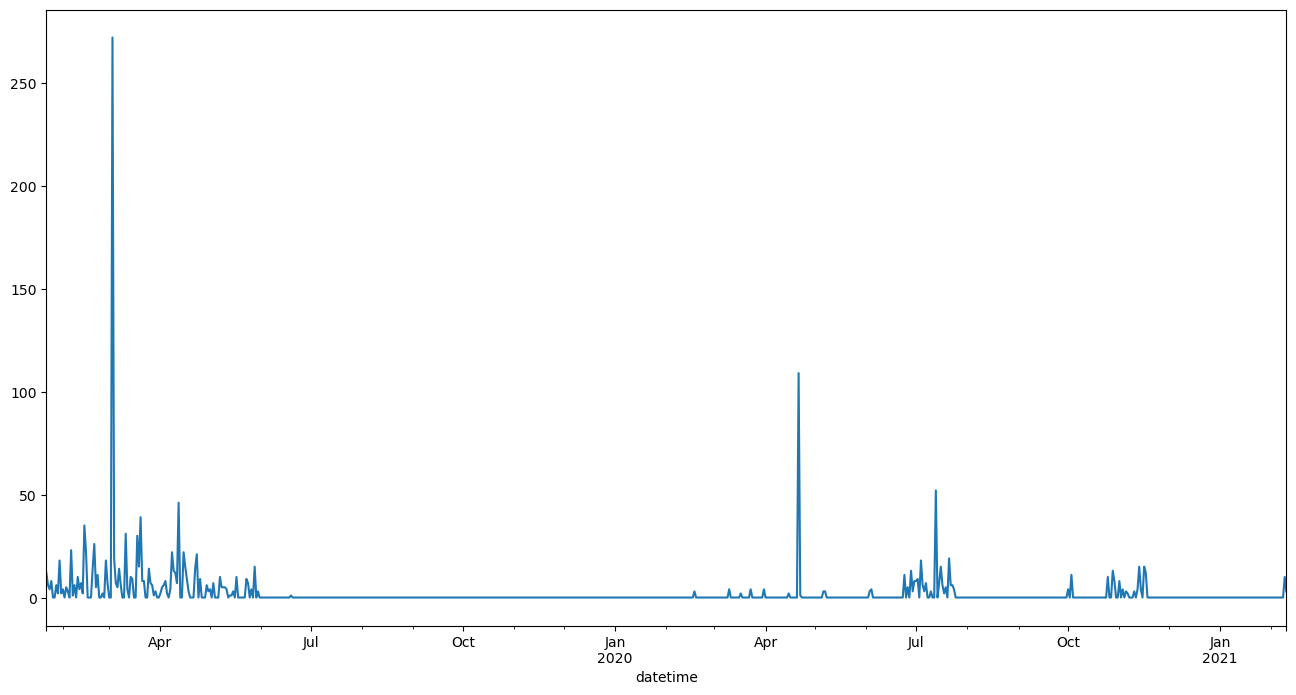

In [76]:
df_341.plot(figsize=(16,8))

In [77]:
anomalies.user_id.value_counts()

80.0     11
146.0    11
18.0     10
291.0     9
51.0      8
         ..
459.0     1
384.0     1
392.0     1
395.0     1
778.0     1
Name: user_id, Length: 380, dtype: int64

<Axes: xlabel='datetime'>

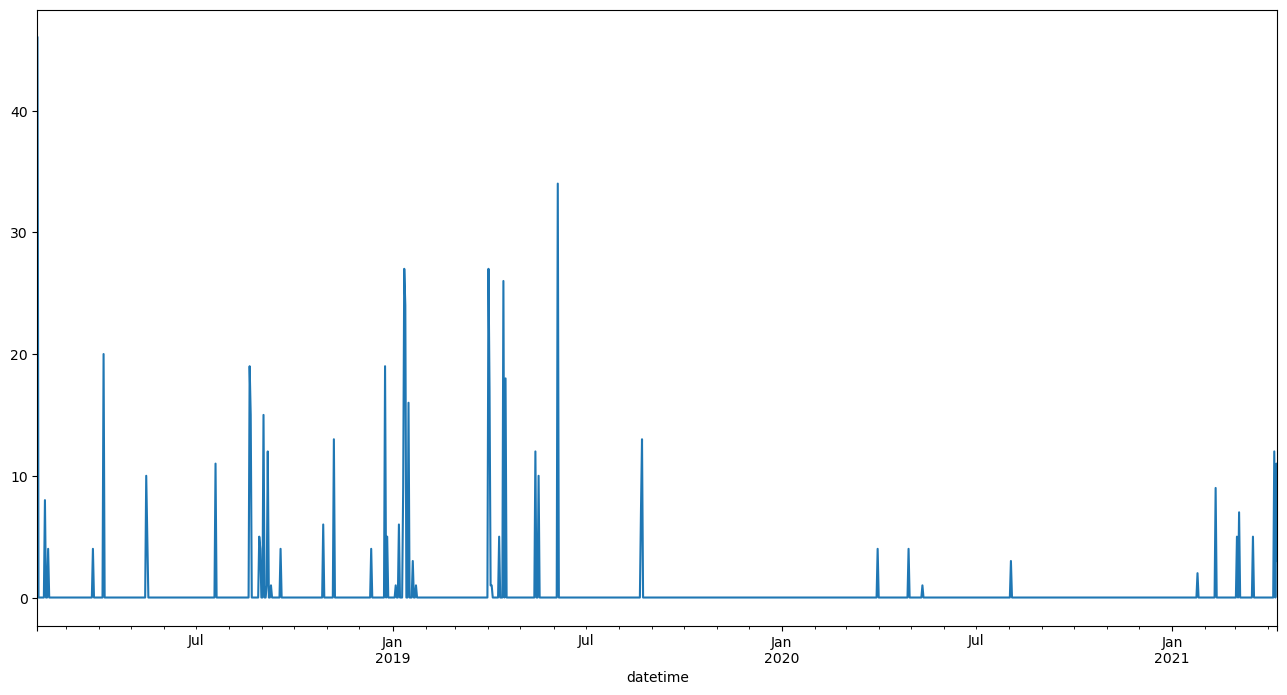

In [86]:
df_80 = one_user_df_prep(df, 80)
df_80.plot(figsize=(16,8))